In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  
import pickle

In [2]:
import sklearn
print(sklearn.__version__)


1.5.2


In [3]:
matches_df=pickle.load(open('match_data.pkl','rb'))
deliveries_df=pickle.load(open('ball_data.pkl','rb'))

In [4]:
df=matches_df.merge(deliveries_df,on='match_id')

In [5]:
df.head(65)

,match_id,team1,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,...,batting_team,batter,non_striker,bowler,runs_batter,runs_extras,runs_total,extras_type,wicket_type,player_dismissed
0,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,Australia,AJ Finch,M Klinger,SL Malinga,0,0,0,None,None,None
1,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,Australia,AJ Finch,M Klinger,SL Malinga,0,0,0,None,None,None
2,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,Australia,AJ Finch,M Klinger,SL Malinga,1,0,1,None,None,None
3,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,Australia,M Klinger,AJ Finch,SL Malinga,2,0,2,None,None,None
4,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,Australia,M Klinger,AJ Finch,SL Malinga,0,0,0,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,Australia,AJ Finch,M Klinger,S Prasanna,1,0,1,None,None,None
61,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,Australia,AJ Finch,M Klinger,PADLR Sandakan,0,0,0,None,None,None
62,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,Australia,AJ Finch,M Klinger,PADLR Sandakan,0,1,1,legbyes,None,None
63,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,Australia,M Klinger,AJ Finch,PADLR Sandakan,0,0,0,None,caught,M Klinger


In [6]:
df.sample(10)

,match_id,team1,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,...,batting_team,batter,non_striker,bowler,runs_batter,runs_extras,runs_total,extras_type,wicket_type,player_dismissed
456407,1457230,Cambodia,Saudi Arabia,University of Doha for Science and Technology,Doha,[2024-11-25],Saudi Arabia,NaN,5.0,[Faisal Khan],...,Cambodia,Luqman Butt,Lakshit Gupta,Zain Ul Abidin,0,0,0,None,None,None
554174,1498698,Belgium,Austria,"Velden Cricket Ground, Latschach",Latschach,[2025-08-24],Austria,NaN,4.0,[Ranjit Singh],...,Austria,MPS Cheema,Waqar Zalmai,B Niaz,1,0,1,None,None,None
515044,1488334,Bahamas,Canada,"Maple Leaf North-West Ground, King City",King City,[2025-06-21],Canada,NaN,7.0,[Kaleem Sana],...,Bahamas,Sandeep Goud,K Hinds,Saad Bin Zafar,1,0,1,None,None,None
107067,1263155,South Africa,West Indies,"National Cricket Stadium, St George's, Grenada",St George's,[2021-07-03],South Africa,25.0,NaN,[AK Markram],...,West Indies,SO Hetmyer,KA Pollard,T Shamsi,0,0,0,None,None,None
348343,1415739,Papua New Guinea,New Zealand,"Brian Lara Stadium, Tarouba, Trinidad",Tarouba,[2024-06-17],New Zealand,NaN,7.0,[LH Ferguson],...,Papua New Guinea,A Nao,N Vanua,TG Southee,1,0,1,None,None,None
83630,1213875,Sri Lanka,West Indies,Pallekele International Cricket Stadium,Kandy,[2020-03-06],West Indies,NaN,7.0,[AD Russell],...,West Indies,LMP Simmons,BA King,SL Malinga,0,1,1,wides,None,None
303147,1388217,New Zealand,Pakistan,"Seddon Park, Hamilton",Hamilton,[2024-01-14],New Zealand,21.0,NaN,[FH Allen],...,New Zealand,FH Allen,DP Conway,Abbas Afridi,0,1,1,wides,None,None
21818,1140993,India,Ireland,"The Village, Malahide",Dublin,[2018-06-29],India,143.0,NaN,[KL Rahul],...,India,KL Rahul,V Kohli,Simi Singh,0,1,1,wides,None,None
362737,1422802,Hong Kong,Qatar,University of Doha for Science and Technology,Doha,[2024-02-27],Hong Kong,10.0,NaN,[M Coetzee],...,Qatar,MM Baig,Muhammad Tanveer,Nasrulla Rana,1,0,1,None,None,None
575559,1510178,Bahrain,Indonesia,Udayana Cricket Ground,Bali,[2025-11-18],Bahrain,53.0,NaN,[Asif Ali],...,Indonesia,S Kharvi,GA Priandana,Ali Dawood,0,0,0,None,None,None


In [7]:
df['innings']

0         1st innings
1         1st innings
2         1st innings
3         1st innings
4         1st innings
             ...     
687330    2nd innings
687331    2nd innings
687332    2nd innings
687333    2nd innings
687334    2nd innings
Name: innings, Length: 687335, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687335 entries, 0 to 687334
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          687335 non-null  object 
 1   team1             687335 non-null  object 
 2   team2             687335 non-null  object 
 3   venue             687335 non-null  object 
 4   city              658915 non-null  object 
 5   dates             687335 non-null  object 
 6   winner            672542 non-null  object 
 7   by_runs           349061 non-null  float64
 8   by_wickets        323237 non-null  float64
 9   player_of_match   637067 non-null  object 
 10  innings           687335 non-null  object 
 11  ball              687335 non-null  float64
 12  batting_team      687335 non-null  object 
 13  batter            687335 non-null  object 
 14  non_striker       687335 non-null  object 
 15  bowler            687335 non-null  object 
 16  runs_batter       68

In [9]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 0 if x == None else 1)

In [10]:
## making wickets left using player_dismissed column
df['player_dismissed'] = df['player_dismissed'].astype('int')
df

,match_id,team1,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,...,batting_team,batter,non_striker,bowler,runs_batter,runs_extras,runs_total,extras_type,wicket_type,player_dismissed
0,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,Australia,AJ Finch,M Klinger,SL Malinga,0,0,0,None,None,0
1,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,Australia,AJ Finch,M Klinger,SL Malinga,0,0,0,None,None,0
2,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,Australia,AJ Finch,M Klinger,SL Malinga,1,0,1,None,None,0
3,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,Australia,M Klinger,AJ Finch,SL Malinga,2,0,2,None,None,0
4,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,Australia,M Klinger,AJ Finch,SL Malinga,0,0,0,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687330,995469,Sri Lanka,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],...,Australia,TM Head,PM Nevill,SS Pathirana,1,0,1,None,None,0
687331,995469,Sri Lanka,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],...,Australia,PM Nevill,TM Head,SS Pathirana,3,0,3,None,None,0
687332,995469,Sri Lanka,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],...,Australia,TM Head,PM Nevill,SS Pathirana,0,0,0,None,None,0
687333,995469,Sri Lanka,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],...,Australia,TM Head,PM Nevill,SS Pathirana,0,0,0,None,None,0


In [11]:
## Creating a current score column by doing cumulative sum in runs column
# Convert 'runs' column to numeric dtype
df['runs_total'] = pd.to_numeric(df['runs_total'], errors='coerce')

df['current_score'] = df.groupby('match_id')['runs_total'].cumsum()

In [12]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


In [13]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')

In [14]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)

In [15]:
# 1. Calculate cumulative wickets fallen per match and innings
wickets_fallen = df.groupby(['match_id','innings'])['player_dismissed'].cumsum()

# 2. Subtract that from 10 to get actual wickets remaining
df['wickets_left'] = 10 - wickets_fallen

# 3. Check a sample (you will now see values like 10, 8, 5, etc.)
print(df['wickets_left'].unique())

[10  9  8  7  6  5  4  3  2  1  0]


In [16]:
df.head(50)

,match_id,team1,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,...,runs_total,extras_type,wicket_type,player_dismissed,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,None,None,0,0,0,1,1,119,10
1,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,None,None,0,0,0,2,2,118,10
2,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,1,None,None,0,1,0,3,3,117,10
3,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,2,None,None,0,3,0,4,4,116,10
4,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,None,None,0,3,0,5,5,115,10
5,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,3,None,None,0,6,0,6,6,114,10
6,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,None,None,0,6,1,1,7,113,10
7,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,1,None,None,0,7,1,2,8,112,10
8,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,None,None,0,7,1,3,9,111,10
9,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,None,None,0,7,1,4,10,110,10


In [17]:
df['wickets_left'].sample(20)

152047     3
115417     3
627679     4
478432     6
329324     6
29498      9
278769     5
186703     9
257333     2
306851    10
220157     6
337425     9
258703     8
231088     9
16307     10
145606     1
117345    10
589392    10
308124     6
150217     8
Name: wickets_left, dtype: int64

In [18]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

In [19]:

df['runs_TOTAL'] = pd.to_numeric(df['runs_total'], errors='coerce')

groups = df.groupby(['match_id','innings'])

last_five = []
for group_id, group_data in groups:
    rolling_sum = group_data['runs_total'].rolling(window=30, min_periods=1).sum()

    if len(group_data) < 30:
        rolling_sum.iloc[-1] = np.nan
    last_five.extend(rolling_sum.values.tolist())

df['last_five_runs'] = last_five

In [20]:
groups = df.groupby(['match_id', 'innings'])

last_five_wickets = []
for group_id, group_data in groups:
    # Rolling sum of wickets over the last 30 balls
    rolling_wickets = group_data['player_dismissed'].rolling(window=30, min_periods=1).sum()
    
    # Optional: If you want the first 30 balls to be NaN (standard for "last 5")
    # rolling_wickets.iloc[:30] = np.nan
    
    last_five_wickets.extend(rolling_wickets.values.tolist())

df['last_five_wickets'] = last_five_wickets

print("Success: 'last_five_wickets' column added.")

Success: 'last_five_wickets' column added.


In [21]:
innings_map = {'1st innings': 1, '2nd innings': 2}
df['innings'] = df['innings'].map(innings_map)

df = df[df['innings'] == 1]

total_score_df = df.groupby('match_id')['runs_total'].sum().reset_index()
total_score_df.rename(columns={'runs_total': 'final_score'}, inplace=True)

df = df.merge(total_score_df, on='match_id')

In [22]:
df

,match_id,team1,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,...,over,ball_no,balls_bowled,balls_left,wickets_left,crr,runs_TOTAL,last_five_runs,last_five_wickets,final_score
0,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,1,1,119,10,0.000000,0,0.0,0.0,168
1,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,2,2,118,10,0.000000,0,0.0,0.0,168
2,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,3,3,117,10,2.000000,1,1.0,0.0,168
3,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,4,4,116,10,4.500000,2,3.0,0.0,168
4,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,5,5,115,10,3.600000,0,3.0,0.0,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368237,995469,Sri Lanka,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],...,19,3,117,3,2,6.410256,1,32.0,1.0,128
368238,995469,Sri Lanka,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],...,19,4,118,2,2,6.355932,0,32.0,1.0,128
368239,995469,Sri Lanka,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],...,19,5,119,1,1,6.302521,0,32.0,2.0,128
368240,995469,Sri Lanka,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],...,19,6,120,0,1,6.350000,2,33.0,2.0,128


In [23]:
teams= [
    "India", "Sri Lanka", "Afghanistan", "Australia", 
    "Bangladesh", "England", "South Africa", "United States", 
    "West Indies", "Ireland", "New Zealand", "Pakistan", 
    "Canada", "Italy", "Netherlands", "Namibia", 
    "Zimbabwe", "Nepal", "Oman", "United Arab Emirates"
]

In [24]:
df = df[df['team1'].isin(teams)]
df = df[df['team2'].isin(teams)]


In [25]:
df

,match_id,team1,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,...,over,ball_no,balls_bowled,balls_left,wickets_left,crr,runs_TOTAL,last_five_runs,last_five_wickets,final_score
0,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,1,1,119,10,0.000000,0,0.0,0.0,168
1,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,2,2,118,10,0.000000,0,0.0,0.0,168
2,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,3,3,117,10,2.000000,1,1.0,0.0,168
3,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,4,4,116,10,4.500000,2,3.0,0.0,168
4,1001349,Australia,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],...,0,5,5,115,10,3.600000,0,3.0,0.0,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368237,995469,Sri Lanka,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],...,19,3,117,3,2,6.410256,1,32.0,1.0,128
368238,995469,Sri Lanka,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],...,19,4,118,2,2,6.355932,0,32.0,1.0,128
368239,995469,Sri Lanka,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],...,19,5,119,1,1,6.302521,0,32.0,2.0,128
368240,995469,Sri Lanka,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],...,19,6,120,0,1,6.350000,2,33.0,2.0,128


In [26]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [27]:
df['city'] = cities

In [28]:
city=sorted(df['city'].unique().tolist())

In [29]:
import pickle
pickle.dump(city,open('city.pkl','wb'))

In [30]:
team=sorted(df['team1'].unique().tolist())


In [31]:
pickle.dump(team,open('team.pkl','wb'))


In [32]:
df['bowling_team'] = np.where(df['batting_team'] == df['team1'], df['team2'], df['team1'])

In [33]:
df=df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five_runs','last_five_wickets','final_score']]

In [34]:
df['city'].isnull().sum()

np.int64(0)

In [35]:
df.sample(5)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five_runs,last_five_wickets,final_score
210601,Bangladesh,West Indies,Kingstown,15,107,10,6.923077,15.0,0.0,147
61238,Bangladesh,Australia,Dhaka,57,71,9,6.979592,23.0,1.0,122
354804,South Africa,Bangladesh,Mirpur,98,54,9,8.909091,47.0,1.0,169
198888,Pakistan,New Zealand,Rawalpindi,23,106,10,9.857143,23.0,0.0,178
52919,South Africa,Ireland,Dublin,34,100,9,10.200000,34.0,1.0,165


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

# Loading the dataset (assuming ipl.csv is in the same directory)


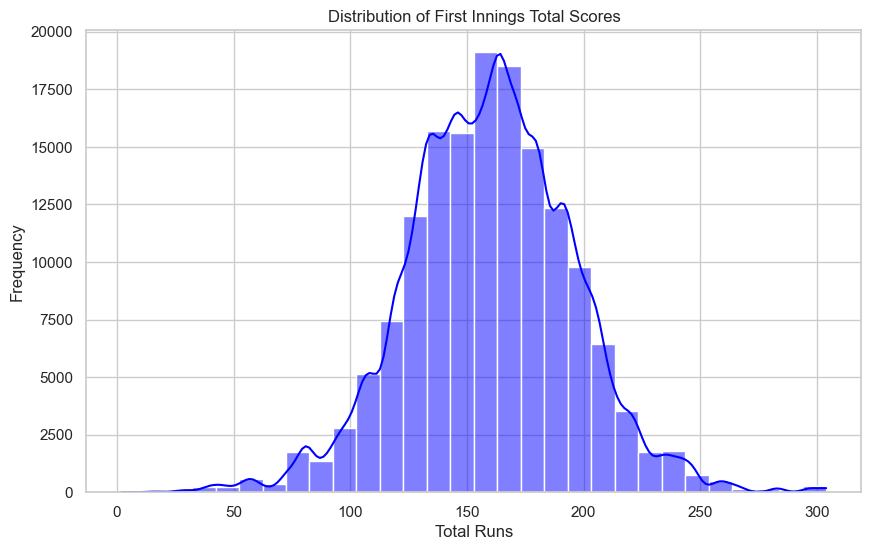

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['final_score'], bins=30, kde=True, color='blue')
plt.title('Distribution of First Innings Total Scores')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()

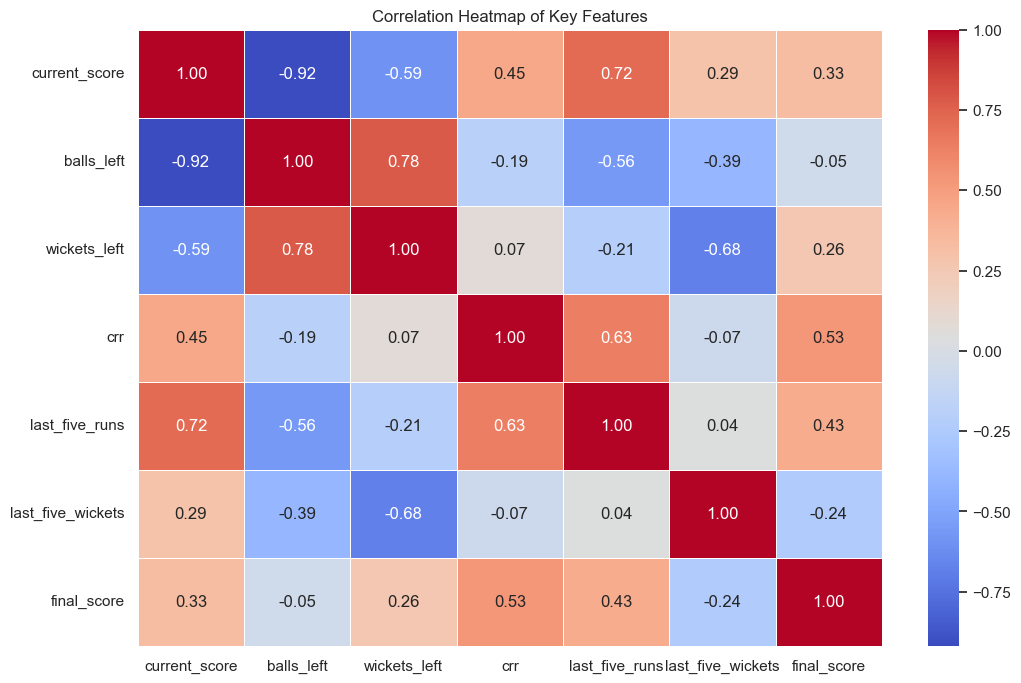

In [38]:
# Selecting numerical columns for correlation
numerical_cols = ['current_score', 'balls_left', 'wickets_left', 
                  'crr', 'last_five_runs', 'last_five_wickets', 'final_score']

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Key Features')
plt.show()

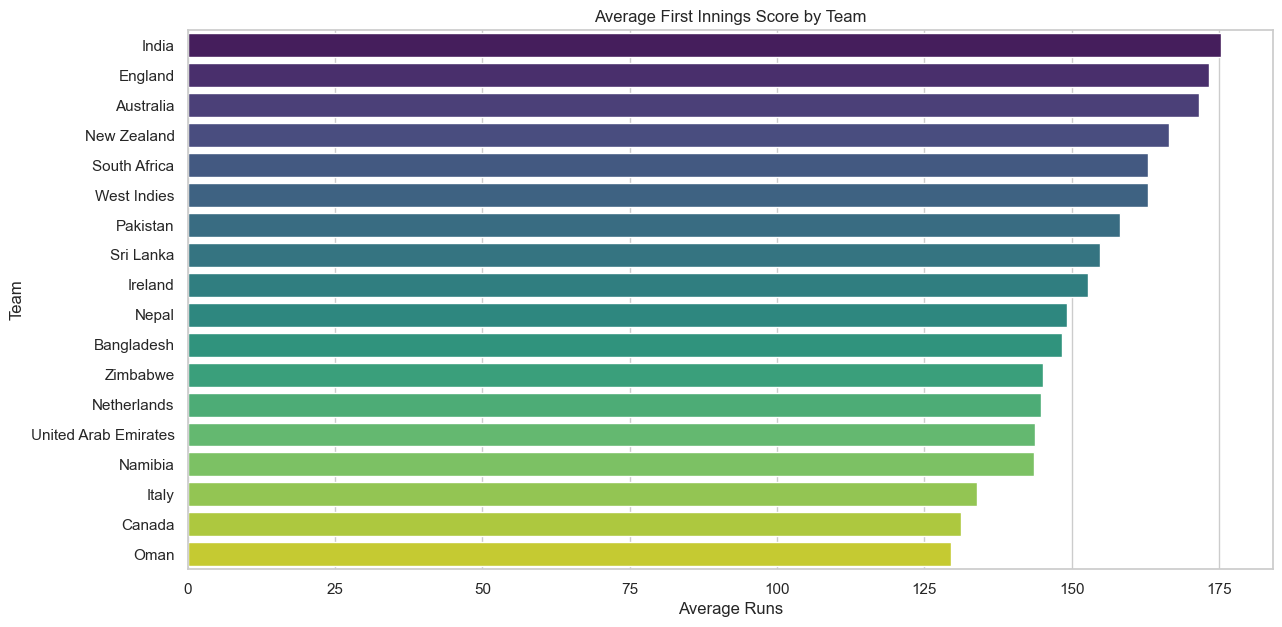

In [39]:
plt.figure(figsize=(14, 7))
avg_runs = df.groupby('batting_team')['final_score'].mean().sort_values(ascending=False)
sns.barplot(x=avg_runs.values, y=avg_runs.index, palette='viridis')
plt.title('Average First Innings Score by Team')
plt.xlabel('Average Runs')
plt.ylabel('Team')
plt.show()

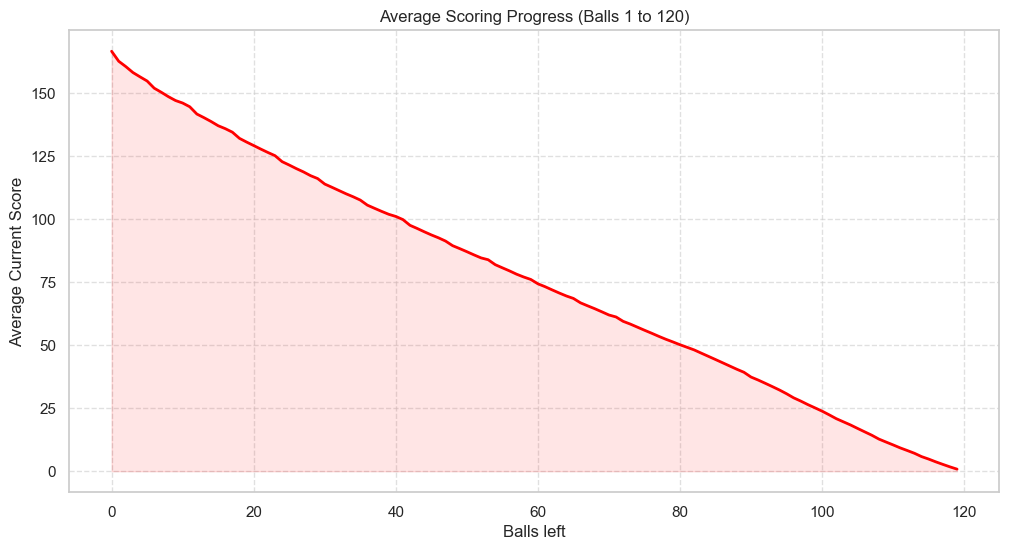

In [40]:
avg_progress = df.groupby('balls_left')['current_score'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(avg_progress['balls_left'], avg_progress['current_score'], color='red', linewidth=2)
plt.fill_between(avg_progress['balls_left'], avg_progress['current_score'], alpha=0.1, color='red')
plt.title('Average Scoring Progress (Balls 1 to 120)')
plt.xlabel('Balls left')
plt.ylabel('Average Current Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error,root_mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

df.dropna(inplace=True)

X = df[['batting_team', 'bowling_team', 'city', 'current_score', 'balls_left', 'wickets_left', 'crr', 'last_five_runs', 'last_five_wickets']]
y = df['final_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the transformer for categorical columns
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), ['batting_team', 'bowling_team', 'city']),
    ('num', 'passthrough', ['current_score', 'balls_left', 'wickets_left', 'crr', 'last_five_runs', 'last_five_wickets'])
], remainder='passthrough')

In [42]:
from sklearn.linear_model import LinearRegression

lr_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LinearRegression())
])

lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

print("Linear Regression - R2 Score:", r2_score(y_test, y_pred))
print("Linear Regression - MAE:", mean_absolute_error(y_test, y_pred))
print("Linear Regression - RMSE:", root_mean_squared_error(y_test, y_pred))

Linear Regression - R2 Score: 0.5970676667180526
Linear Regression - MAE: 16.472094777693712
Linear Regression - RMSE: 22.52330283221358


Tuned Random Forest - R2: 0.7973134752974682
Tuned Random Forest - MAE: 10.859305008019884
Tuned Random Forest - RMSE: 15.974543446845935


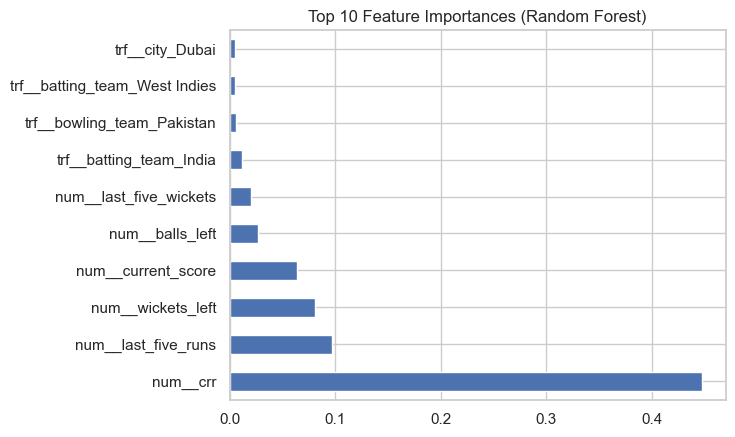

In [43]:
from sklearn.ensemble import RandomForestRegressor 
rf_tuned = Pipeline(steps=[
    ('step1', trf),
    ('step2', RandomForestRegressor(
        n_estimators=2000,
        max_depth=20,
        max_samples=0.8,
        max_features=0.6,
        min_samples_split=5,
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    ))
])

rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
print("Tuned Random Forest - R2:", r2_score(y_test, y_pred))
print("Tuned Random Forest - MAE:", mean_absolute_error(y_test, y_pred))
print("Tuned Random Forest - RMSE:", root_mean_squared_error(y_test, y_pred))
# Feature Importance Graph
feat_importances = pd.Series(rf_tuned.named_steps['step2'].feature_importances_, 
                             index=rf_tuned.named_steps['step1'].get_feature_names_out())
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

Tuned Gradient Boosting - R2: 0.8886074326336179
Tuned Gradient Boosting - MAE: 7.2501296618528865
Tuned Gradient Boosting - RMSE: 11.84251990983078


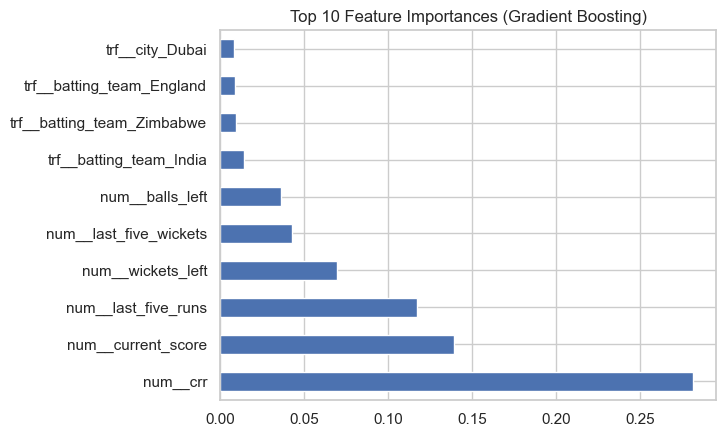

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gb_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', GradientBoostingRegressor(
        n_estimators=2000,
        learning_rate=0.07,
        max_depth=6,
        subsample=0.7,
        loss='huber', # Great for cricket where scores can be extreme
        max_features='sqrt',
        random_state=42
    ))
])

gb_pipe.fit(X_train, y_train)
y_pred = gb_pipe.predict(X_test)
print("Tuned Gradient Boosting - R2:", r2_score(y_test, y_pred))
print("Tuned Gradient Boosting - MAE:", mean_absolute_error(y_test, y_pred))
print("Tuned Gradient Boosting - RMSE:", root_mean_squared_error(y_test, y_pred))
# Feature Importance Graph
feat_importances = pd.Series(gb_pipe.named_steps['step2'].feature_importances_, 
                             index=gb_pipe.named_steps['step1'].get_feature_names_out())
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.show()

Tuned XGBoost - R2: 0.9570509791374207
Tuned XGBoost - MAE: 3.83667430418886
Tuned XGBoost - RMSE: 7.353475646114891


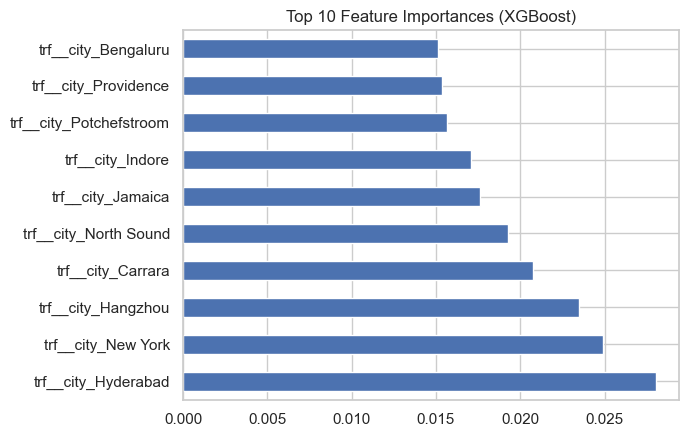

In [46]:
from xgboost import XGBRegressor
xgb_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', XGBRegressor(
        n_estimators=2000,
        learning_rate=0.05,
        max_depth=10,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,
        reg_alpha=10, # L1 regularization
        n_jobs=-1,
        random_state=42,
        objective='reg:squarederror',
        reg_lambda=1
    ))
])

xgb_pipe.fit(X_train, y_train)
y_pred = xgb_pipe.predict(X_test)
print("Tuned XGBoost - R2:", r2_score(y_test, y_pred))
print("Tuned XGBoost - MAE:", mean_absolute_error(y_test, y_pred))
print("Tuned XGBoost - RMSE:", root_mean_squared_error(y_test, y_pred))
# Feature Importance Graph
feat_importances = pd.Series(xgb_pipe.named_steps['step2'].feature_importances_, 
                             index=xgb_pipe.named_steps['step1'].get_feature_names_out())
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()

In [47]:
import sklearn
print(sklearn.__version__)


1.5.2


0:	learn: 28.0890766	total: 384ms	remaining: 12m 47s
100:	learn: 11.2538314	total: 34.4s	remaining: 10m 46s
200:	learn: 8.4978060	total: 1m 6s	remaining: 9m 57s
300:	learn: 7.0901727	total: 1m 41s	remaining: 9m 33s
400:	learn: 6.2335772	total: 2m 14s	remaining: 8m 57s
500:	learn: 5.6557865	total: 2m 47s	remaining: 8m 21s
600:	learn: 5.2198772	total: 3m 18s	remaining: 7m 41s
700:	learn: 4.8707311	total: 3m 52s	remaining: 7m 10s
800:	learn: 4.5699182	total: 4m 27s	remaining: 6m 40s
900:	learn: 4.3259671	total: 5m 1s	remaining: 6m 8s
1000:	learn: 4.1121863	total: 5m 33s	remaining: 5m 32s
1100:	learn: 3.9381704	total: 6m 1s	remaining: 4m 54s
1200:	learn: 3.7824766	total: 6m 24s	remaining: 4m 15s
1300:	learn: 3.6383640	total: 6m 32s	remaining: 3m 30s
1400:	learn: 3.5134479	total: 6m 38s	remaining: 2m 50s
1500:	learn: 3.4014442	total: 6m 44s	remaining: 2m 14s
1600:	learn: 3.2990200	total: 6m 53s	remaining: 1m 43s
1700:	learn: 3.2127545	total: 7m	remaining: 1m 13s
1800:	learn: 3.1302013	total

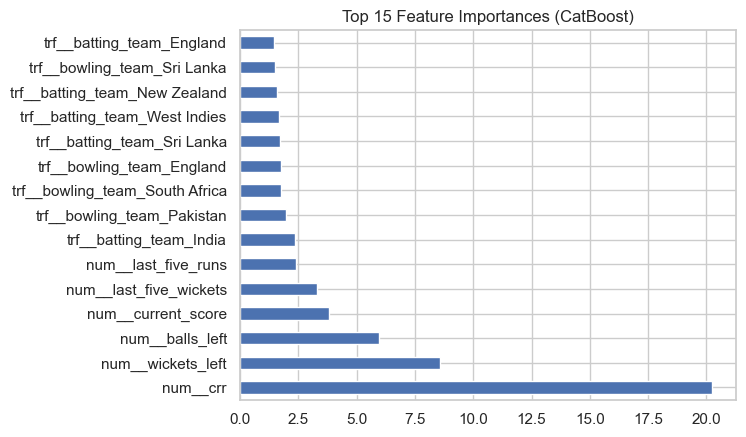

In [55]:
from catboost import CatBoostRegressor

cat_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', CatBoostRegressor(
    iterations=2000,           # Increase from 800 to allow deeper learning
    learning_rate=0.5,        # Slightly lower for more precise optimization
    depth=12,                  # Increase from 6 to capture more complex patterns
    l2_leaf_reg=10,             # Regularization to prevent overfitting
    bagging_temperature=0.2,   # Adds randomness to improve generalization
    random_strength=1,         # Helps prevent overfitting on specific scores
    loss_function='RMSE',      # Standard for regression
    random_seed=42,           # Ensures results are reproducible
    verbose=100  ))
])

cat_pipe.fit(X_train, y_train)
y_pred = cat_pipe.predict(X_test)

print("CatBoost - R2 Score:", r2_score(y_test, y_pred))
print("CatBoost - MAE:", mean_absolute_error(y_test, y_pred))
print("CatBoost - RMSE:", root_mean_squared_error(y_test, y_pred))

# Feature Importance Graph
feat_importances = pd.Series(cat_pipe.named_steps['step2'].get_feature_importance(), 
                             index=cat_pipe.named_steps['step1'].get_feature_names_out())
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 Feature Importances (CatBoost)")
plt.show()

[LightGBM] [Warning] Unknown parameter: huber_delta
[LightGBM] [Warning] Unknown parameter: huber_delta
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.126635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 122553, number of used features: 168
[LightGBM] [Info] Start training from score 159.891231
[LightGBM] [Warning] Unknown parameter: huber_delta
LightGBM - R2 Score: 0.9540916615913795
LightGBM - MAE: 3.8492914243450205
LightGBM - RMSE: 7.602594093429232


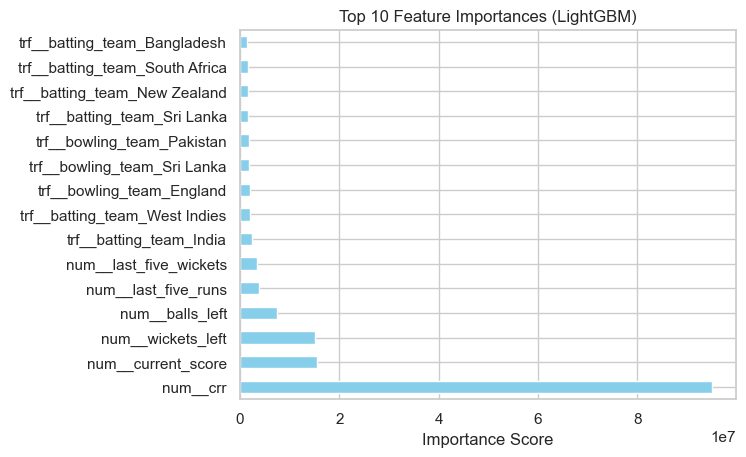

In [56]:
from lightgbm import LGBMRegressor

# Create the LightGBM Pipeline
lgbm_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LGBMRegressor(
        n_estimators=3000,        # More trees for finer detail
        learning_rate=0.5,      # Smaller steps for higher accuracy
        num_leaves=64,            # Complexity of individual trees
        max_depth=12,             # Limits tree depth to prevent over-specialization
        min_child_samples=20,     # Minimum data points in a leaf (prevents overfitting)
        reg_alpha=0.1,            # L1 regularization (removes noise)
        reg_lambda=0.1,           # L2 regularization (smooths weights)
        subsample=0.8,   
        huber_delta=1.0,         # Use 80% of data for each tree (Bagging)
        colsample_bytree=0.8,     # Use 80% of features for each tree
        objective='RMSE',        # Robust to outliers in cricket scores
        random_state=42,
        importance_type='gain',
        n_jobs=-1  # Measures feature contribution to the model
    ))
])

# Training
lgbm_pipe.fit(X_train, y_train)

# Prediction
y_pred = lgbm_pipe.predict(X_test)

# Evaluation
print("LightGBM - R2 Score:", r2_score(y_test, y_pred))
print("LightGBM - MAE:", mean_absolute_error(y_test, y_pred))
print("LightGBM - RMSE:", root_mean_squared_error(y_test, y_pred))

# Feature Importance Graph
# Extracting feature names from the transformer
feature_names = lgbm_pipe.named_steps['step1'].get_feature_names_out()
importances = lgbm_pipe.named_steps['step2'].feature_importances_

feat_importances = pd.Series(importances, index=feature_names)
feat_importances.nlargest(15).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances (LightGBM)")
plt.xlabel("Importance Score")
plt.show()

In [57]:
import pickle

# Saving the 6 models
pickle.dump(lr_pipe, open('lr_model_t20_score.pkl', 'wb'))
pickle.dump(rf_tuned, open('rf_model_t20_score.pkl', 'wb'))
pickle.dump(gb_pipe, open('gb_model_t20_score.pkl', 'wb'))
pickle.dump(xgb_pipe, open('xgb_model_t20_score.pkl', 'wb'))
pickle.dump(cat_pipe, open('cat_model_t20_score.pkl', 'wb'))
pickle.dump(lgbm_pipe, open('lgbm_model_t20_score.pkl', 'wb'))

# Saving teams and cities for the dropdowns
pickle.dump(team, open('teams_t20_score.pkl', 'wb'))
pickle.dump(city, open('cities_t20_score.pkl', 'wb'))